### patient wise plot for originally trained triamese- Yale inference

In [1]:
import numpy as np
npz_path= r"D:\BrainAge\Yale-Brain-Mets-Longitudinal\test.npz"
data= np.load(npz_path)

In [2]:
import pandas as pd

dfs= []
for key in data.files:
    arr= data[key]
    df= pd.DataFrame(arr)
    df.columns = [f"{key}" for i in range(df.shape[1])]
    dfs.append(df)

csv= pd.concat(dfs, axis=1)
csv

,target,prediction,ID
0,81.0,11.966587,YG_04YGLO8ATWRL_2013-07-25_09-26-33_PRE.nii.gz
1,81.0,12.726653,YG_04YGLO8ATWRL_2013-09-07_12-43-53_PRE.nii.gz
2,81.0,10.294897,YG_04YGLO8ATWRL_2013-10-31_12-06-19_PRE.nii.gz
3,82.0,14.590660,YG_04YGLO8ATWRL_2014-01-09_11-38-13_PRE.nii.gz
4,83.0,10.461830,YG_04YGLO8ATWRL_2015-09-21_09-51-40_PRE.nii.gz
...,...,...,...
219,16.0,18.805210,YG_YZ9UXJYTP8S8_2017-05-23_15-33-35_PRE.nii.gz
220,16.0,17.121456,YG_YZ9UXJYTP8S8_2017-05-25_16-18-23_PRE.nii.gz
221,41.0,14.090599,YG_ZQ7RRZ4TJJ4H_2015-08-15_17-15-20_PRE.nii.gz
222,41.0,10.436229,YG_ZQ7RRZ4TJJ4H_2015-08-29_23-16-14_PRE.nii.gz


In [3]:
import re

# Extract patient_id (everything before the 2nd underscore)
csv['patient_id'] = csv['ID'].str.extract(r'^(YG_[A-Z0-9]+)')

# Extract study_datetime (the date part: YYYY-MM-DD)
csv['study_datetime'] = csv['ID'].str.extract(r'_(\d{4}-\d{2}-\d{2})_')

csv

,target,prediction,ID,patient_id,study_datetime
0,81.0,11.966587,YG_04YGLO8ATWRL_2013-07-25_09-26-33_PRE.nii.gz,YG_04YGLO8ATWRL,2013-07-25
1,81.0,12.726653,YG_04YGLO8ATWRL_2013-09-07_12-43-53_PRE.nii.gz,YG_04YGLO8ATWRL,2013-09-07
2,81.0,10.294897,YG_04YGLO8ATWRL_2013-10-31_12-06-19_PRE.nii.gz,YG_04YGLO8ATWRL,2013-10-31
3,82.0,14.590660,YG_04YGLO8ATWRL_2014-01-09_11-38-13_PRE.nii.gz,YG_04YGLO8ATWRL,2014-01-09
4,83.0,10.461830,YG_04YGLO8ATWRL_2015-09-21_09-51-40_PRE.nii.gz,YG_04YGLO8ATWRL,2015-09-21
...,...,...,...,...,...
219,16.0,18.805210,YG_YZ9UXJYTP8S8_2017-05-23_15-33-35_PRE.nii.gz,YG_YZ9UXJYTP8S8,2017-05-23
220,16.0,17.121456,YG_YZ9UXJYTP8S8_2017-05-25_16-18-23_PRE.nii.gz,YG_YZ9UXJYTP8S8,2017-05-25
221,41.0,14.090599,YG_ZQ7RRZ4TJJ4H_2015-08-15_17-15-20_PRE.nii.gz,YG_ZQ7RRZ4TJJ4H,2015-08-15
222,41.0,10.436229,YG_ZQ7RRZ4TJJ4H_2015-08-29_23-16-14_PRE.nii.gz,YG_ZQ7RRZ4TJJ4H,2015-08-29


In [8]:
len(csv)

224

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_patient_scatter(df, patient_id):
    patient_data = df[df['patient_id'] == patient_id].copy()

    # sorting
    patient_data['study_datetime'] = pd.to_datetime(patient_data['study_datetime'])
    patient_data = patient_data.sort_values('study_datetime')

    x = patient_data['target']
    y = patient_data['prediction']
    date = patient_data['study_datetime']

    # Plot
    plt.figure(figsize=(7, 6))

    # Highlight first entry (earliest date)
    plt.scatter(x.iloc[0], y.iloc[0], color='red', s=80, label='First entry')
    
    # Plot remaining points
    plt.scatter(x.iloc[1:], y.iloc[1:], color='blue', label='Other entries')

    # Annotate each point with date + values
    for i in range(len(patient_data)):
        plt.text(
            x.iloc[i] + 0.1, y.iloc[i] + 0.1,
            f"{date.iloc[i].date()} ({x.iloc[i]:.1f}, {y.iloc[i]:.1f})",
            fontsize=8, color='darkgreen'
        )

    # Labels and title
    plt.xlabel('Target')
    plt.ylabel('Prediction')
    plt.title(f'Scatter Plot for Patient: {patient_id}')
    # plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


In [5]:
ids= np.unique(csv['patient_id'])

In [6]:
patient_data= csv[csv['patient_id']==ids[2]]
# patient_data

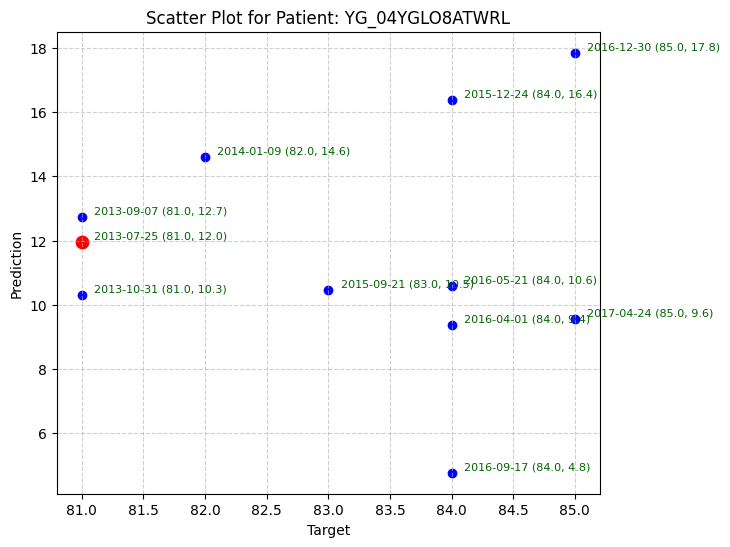

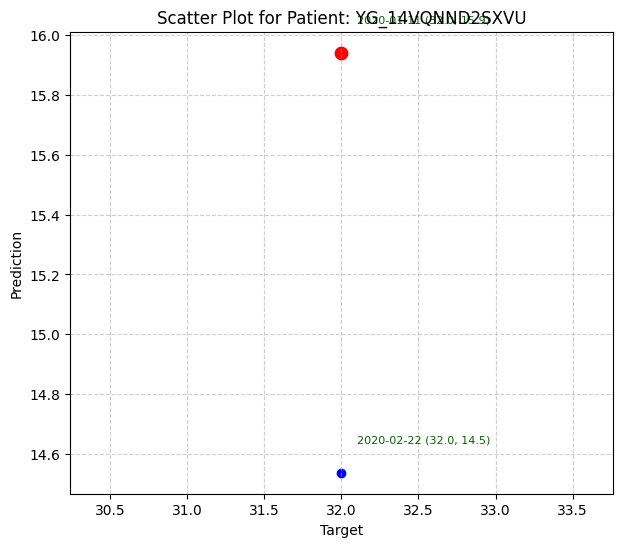

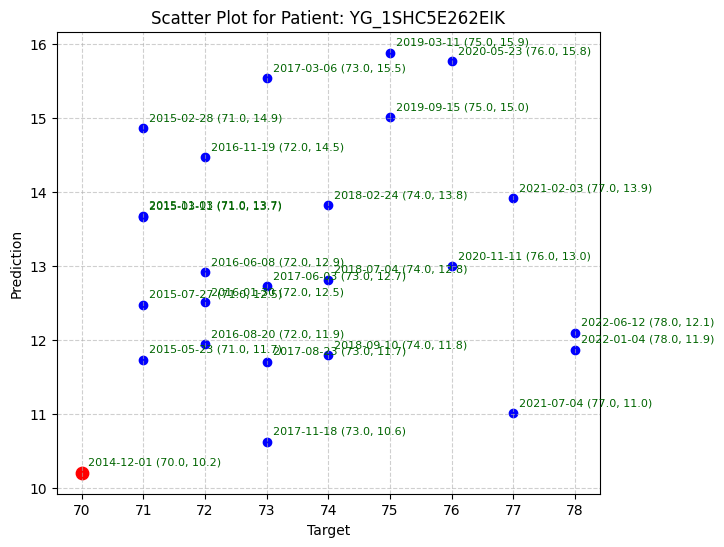

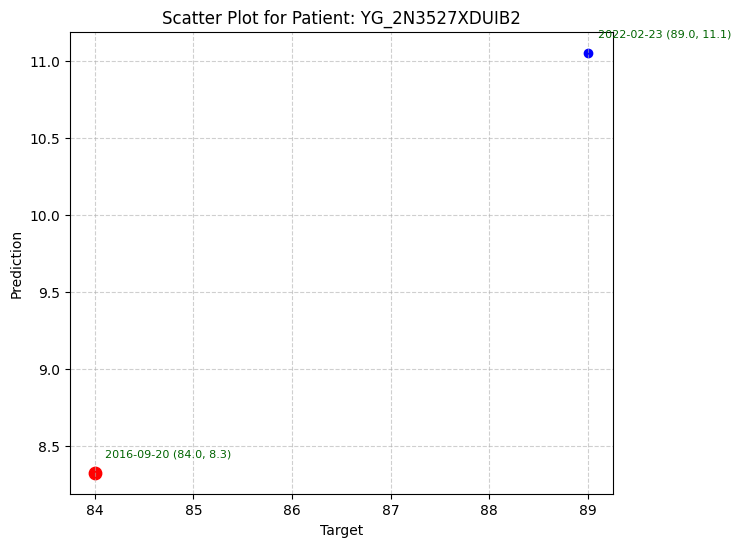

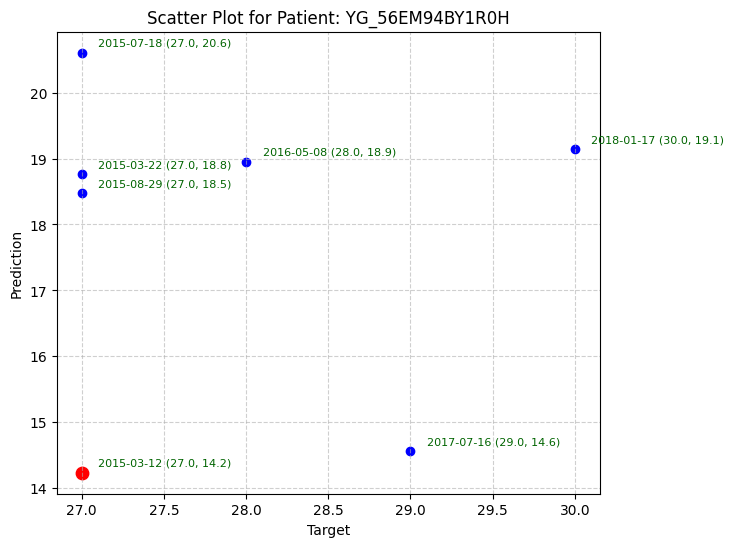

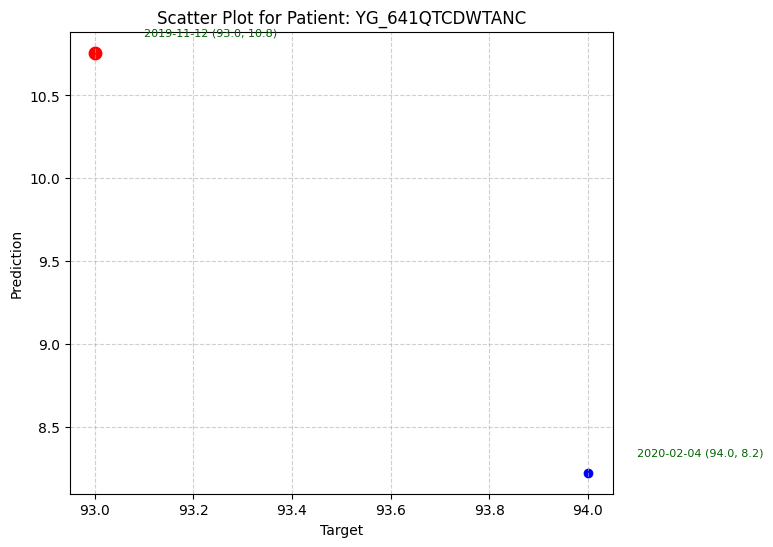

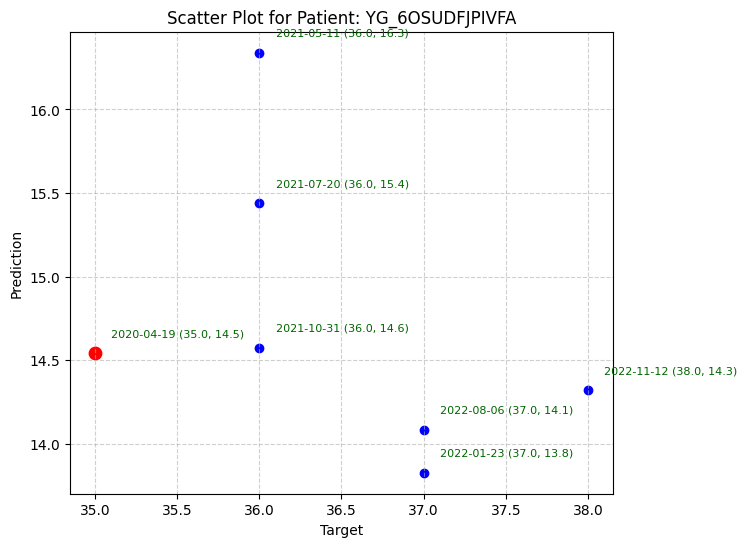

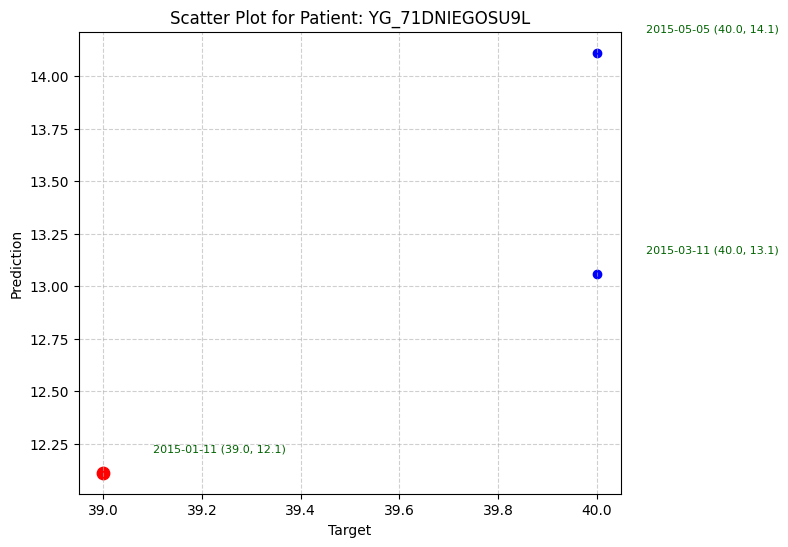

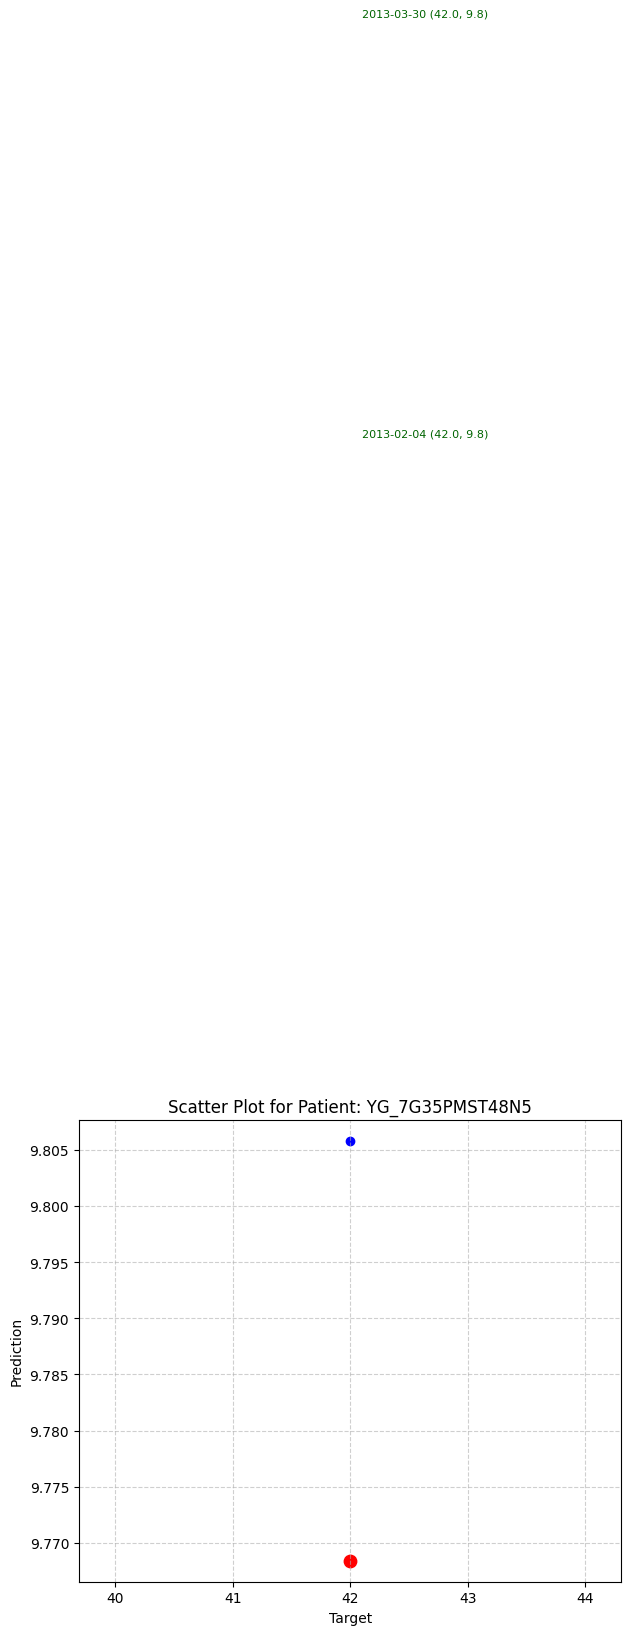

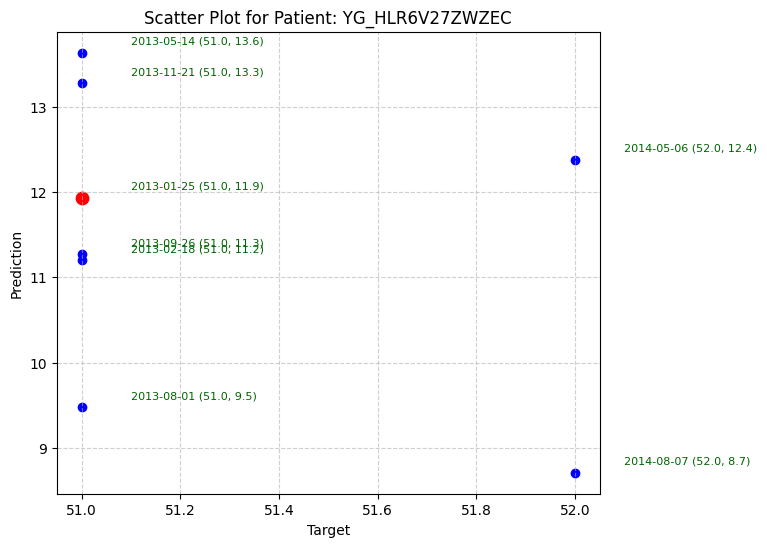

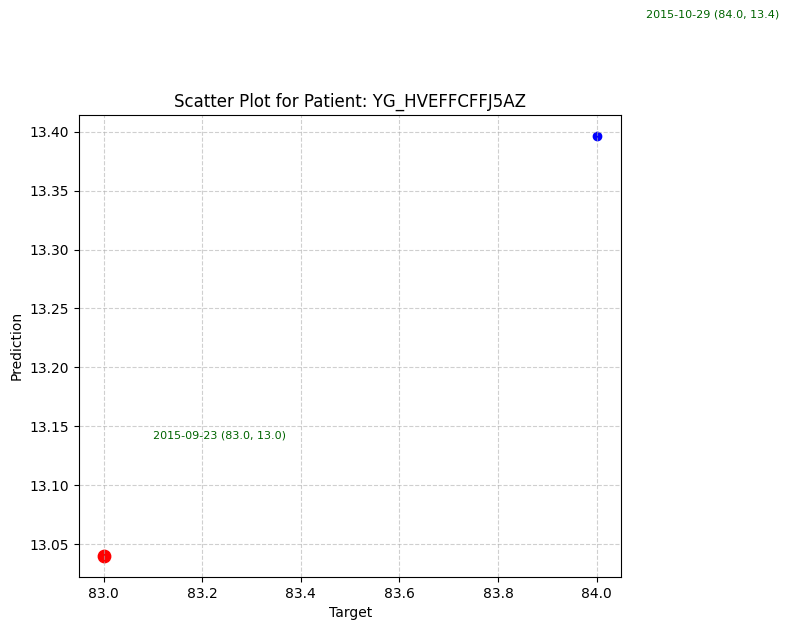

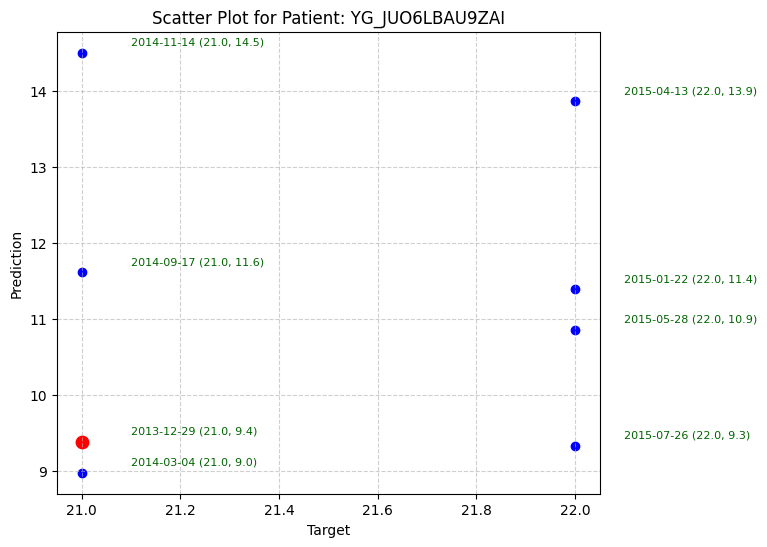

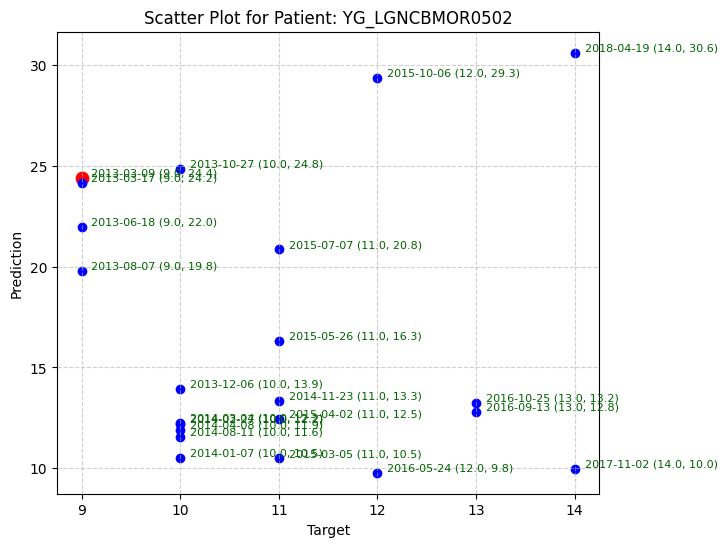

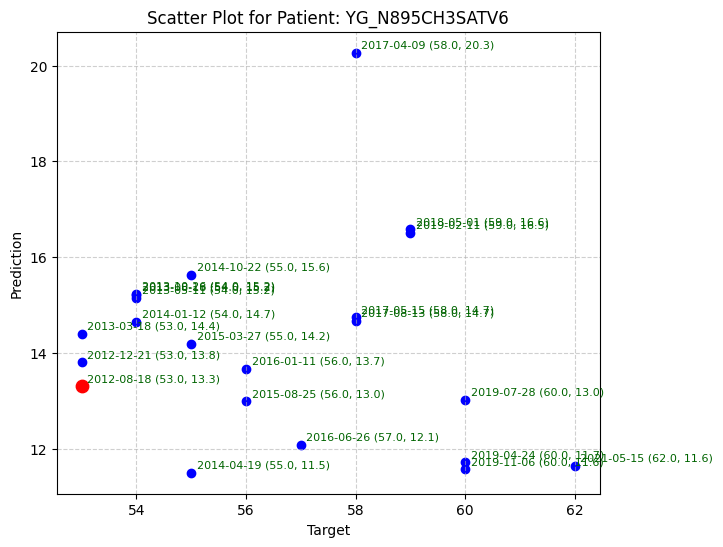

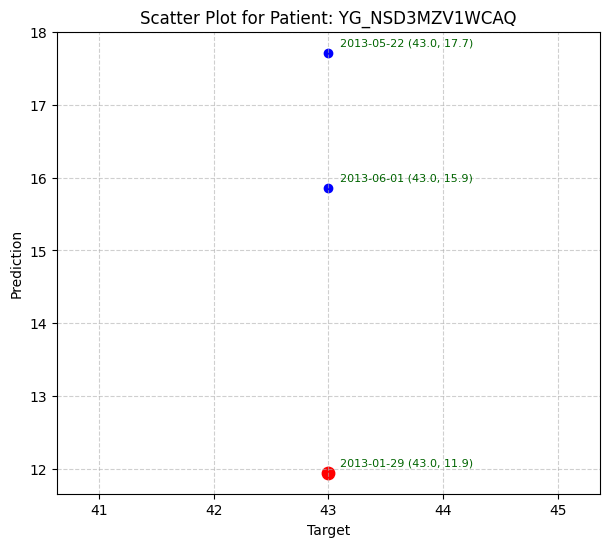

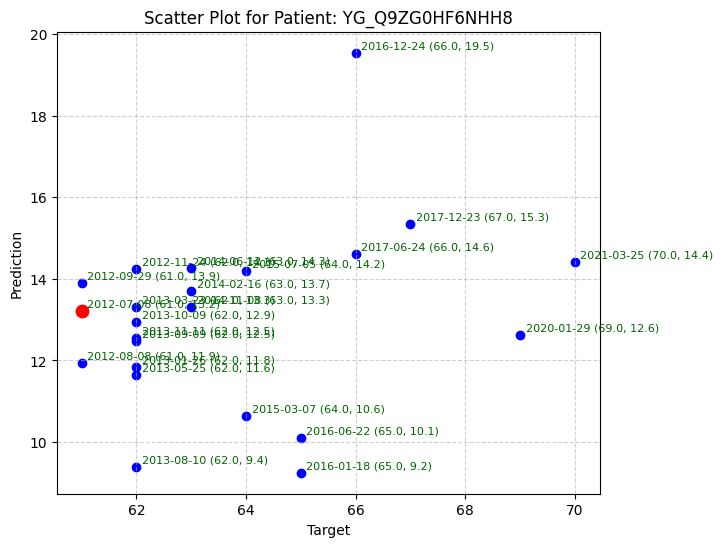

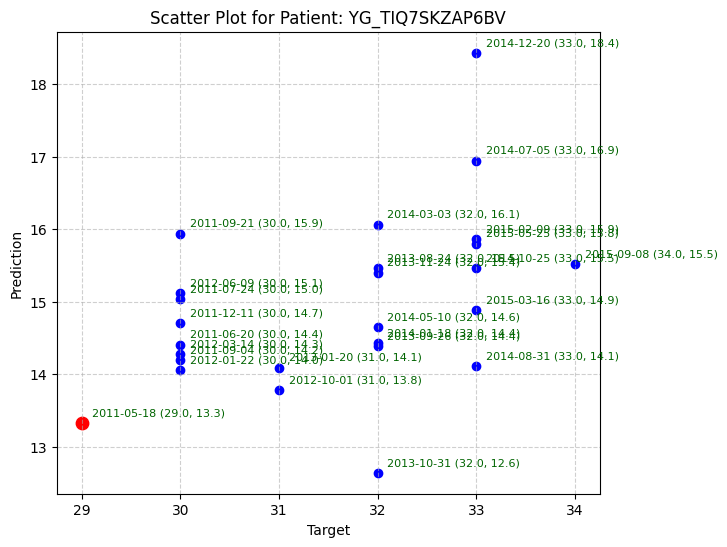

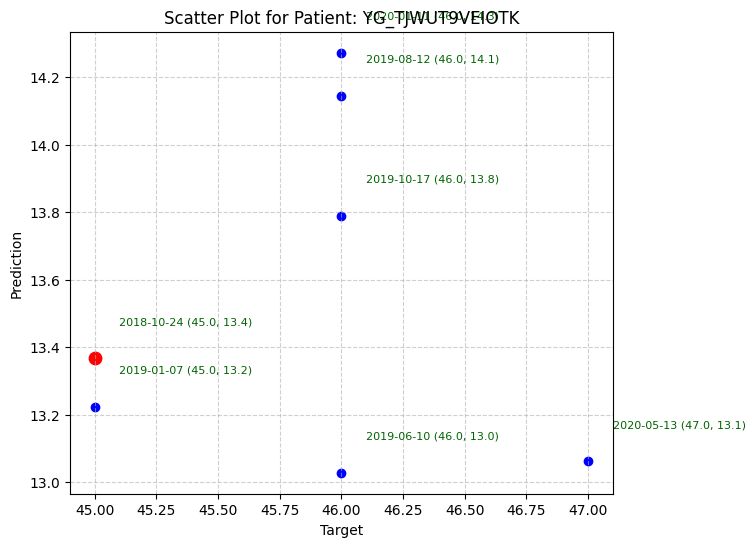

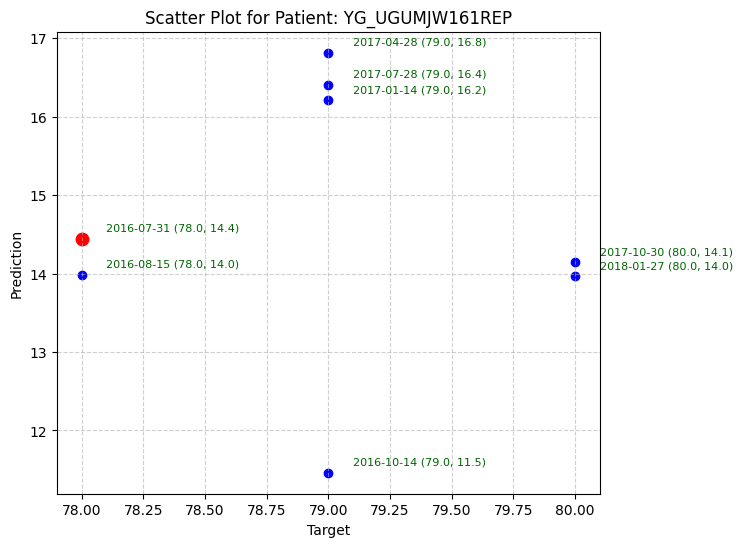

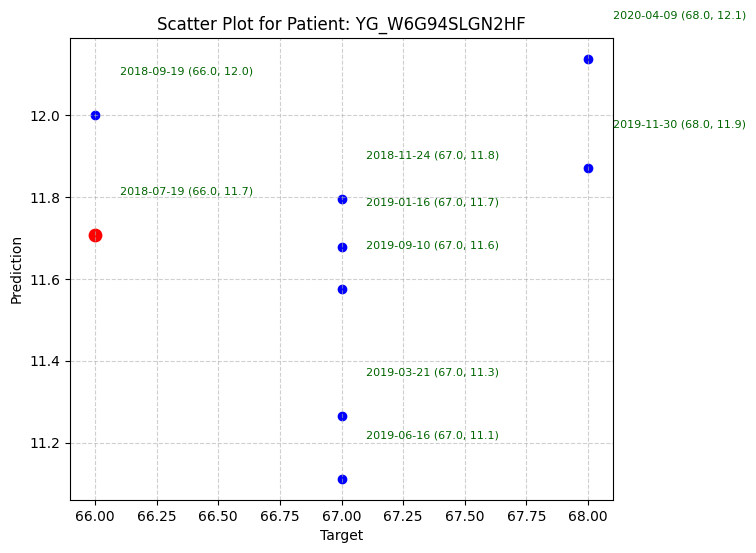

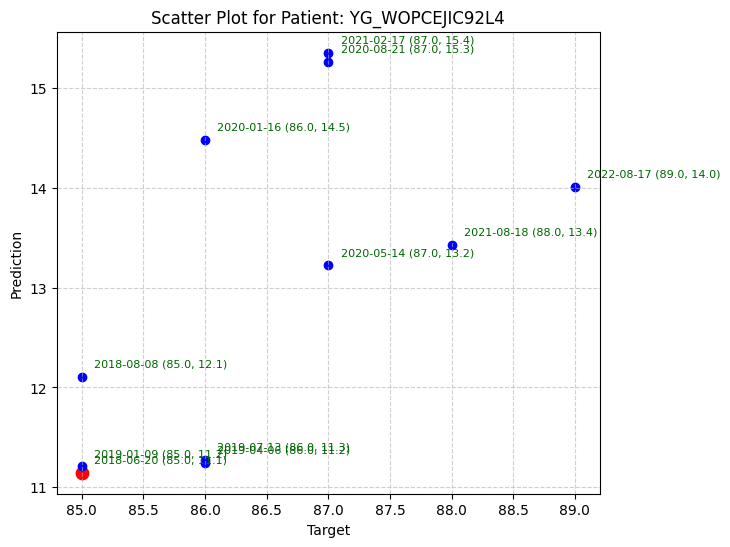

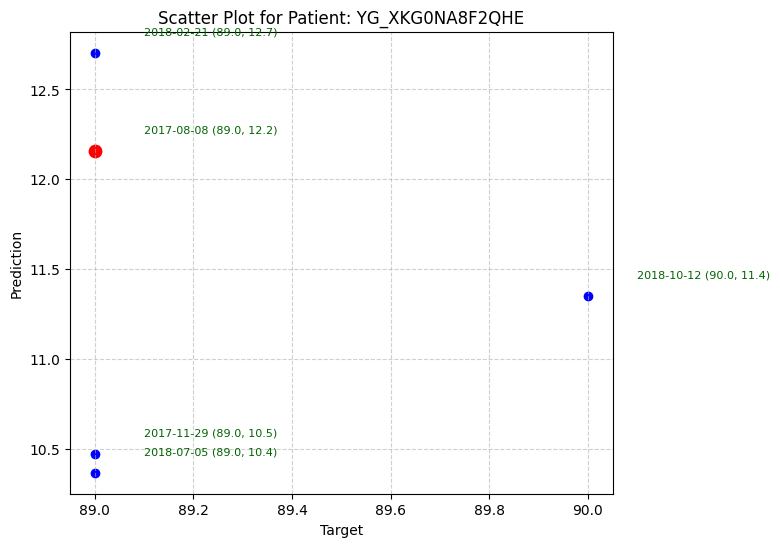

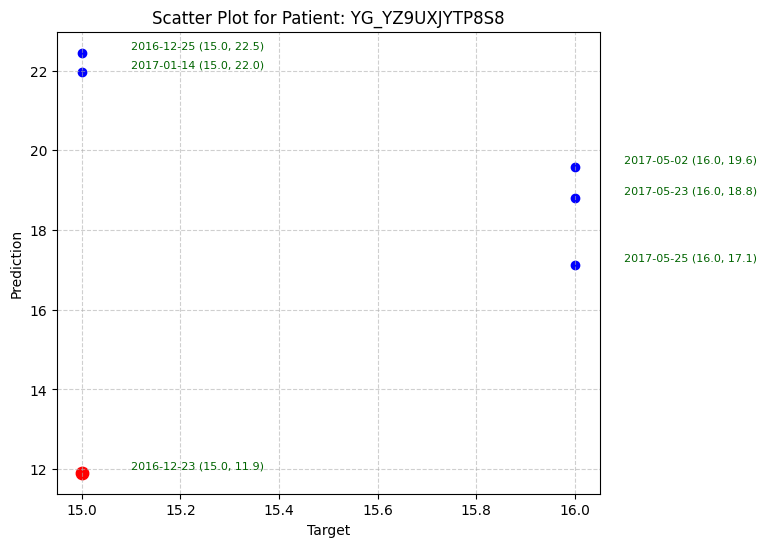

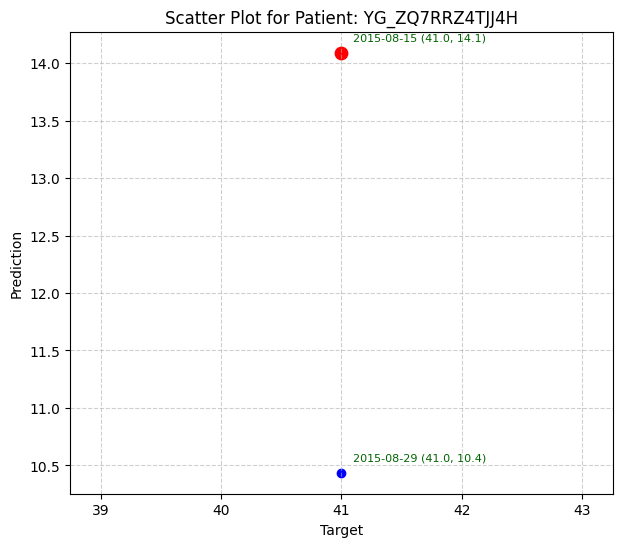

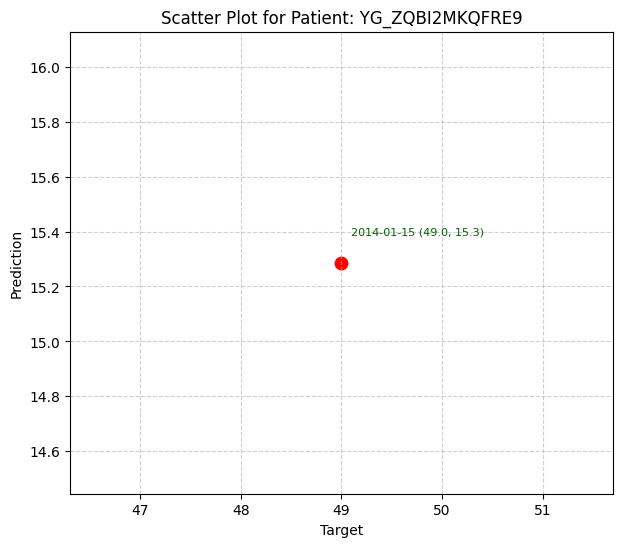

In [7]:
for patient_id in ids:
    plot_patient_scatter(csv, patient_id)
    # break